# Quora answer

Q.  Making a string pallindrome  
https://leetcode.com/problems/minimum-insertion-steps-to-make-a-string-palindrome/

Given a string s. In one step you can insert any character at any index of the string.
Return the minimum number of steps to make s palindrome.

In [ ]:
class Solution {
    public:
        int f(string &s, int i, int j){
            if(i>=j) return 0;
            return s[i]==s[j]?f(s,i+1,j-1):1+min(f(s,i+1,j),f(s,i,j-1));
        }
    
        int minInsertions(string s) {
            int n=s.size();
            return f(s,0,n-1);
        }
    };

In [ ]:
class Solution {
    public:
        int f(string &s, int i, int j, vector<vector<int>> &mem){
            if(i>=j) return 0;
            if(mem[i][j]!=-1) return mem[i][j];
            return mem[i][j]=s[i]==s[j]?f(s,i+1,j-1,mem):1+min(f(s,i+1,j,mem),f(s,i,j-1,mem));
        }
    
        int minInsertions(string s) {
            int n=s.size();
            vector<vector<int>> mem(n,vector<int>(n,-1));
            return f(s,0,n-1,mem);
        }
    };

In [ ]:
class Solution {
    private int f(String s, int i, int j,  int[][] mem){
        if(i>=j) return 0;
        if(mem[i][j]!=-1) return mem[i][j];
        return mem[i][j]=s.charAt(i)==s.charAt(j)?f(s,i+1,j-1,mem):1+Math.min(f(s,i+1,j,mem),f(s,i,j-1,mem));
    }

    public int minInsertions(String s) {
        int n=s.length();
        int rr=n,cc=n;
        int[][] mem = new int[rr][cc];
        for (int i = 0; i < rr; i++) {
            Arrays.fill(mem[i], -1);
        }
        return f(s,0,n-1,mem);
    }
};

In [ ]:
//dp[i][j]= s[i]==s[j]?dp[i+1][j-1]: 1+ min(dp[i+1][j],dp[i][j-1])
dp[i][j]= numbers of moves to conver it to a palindrome

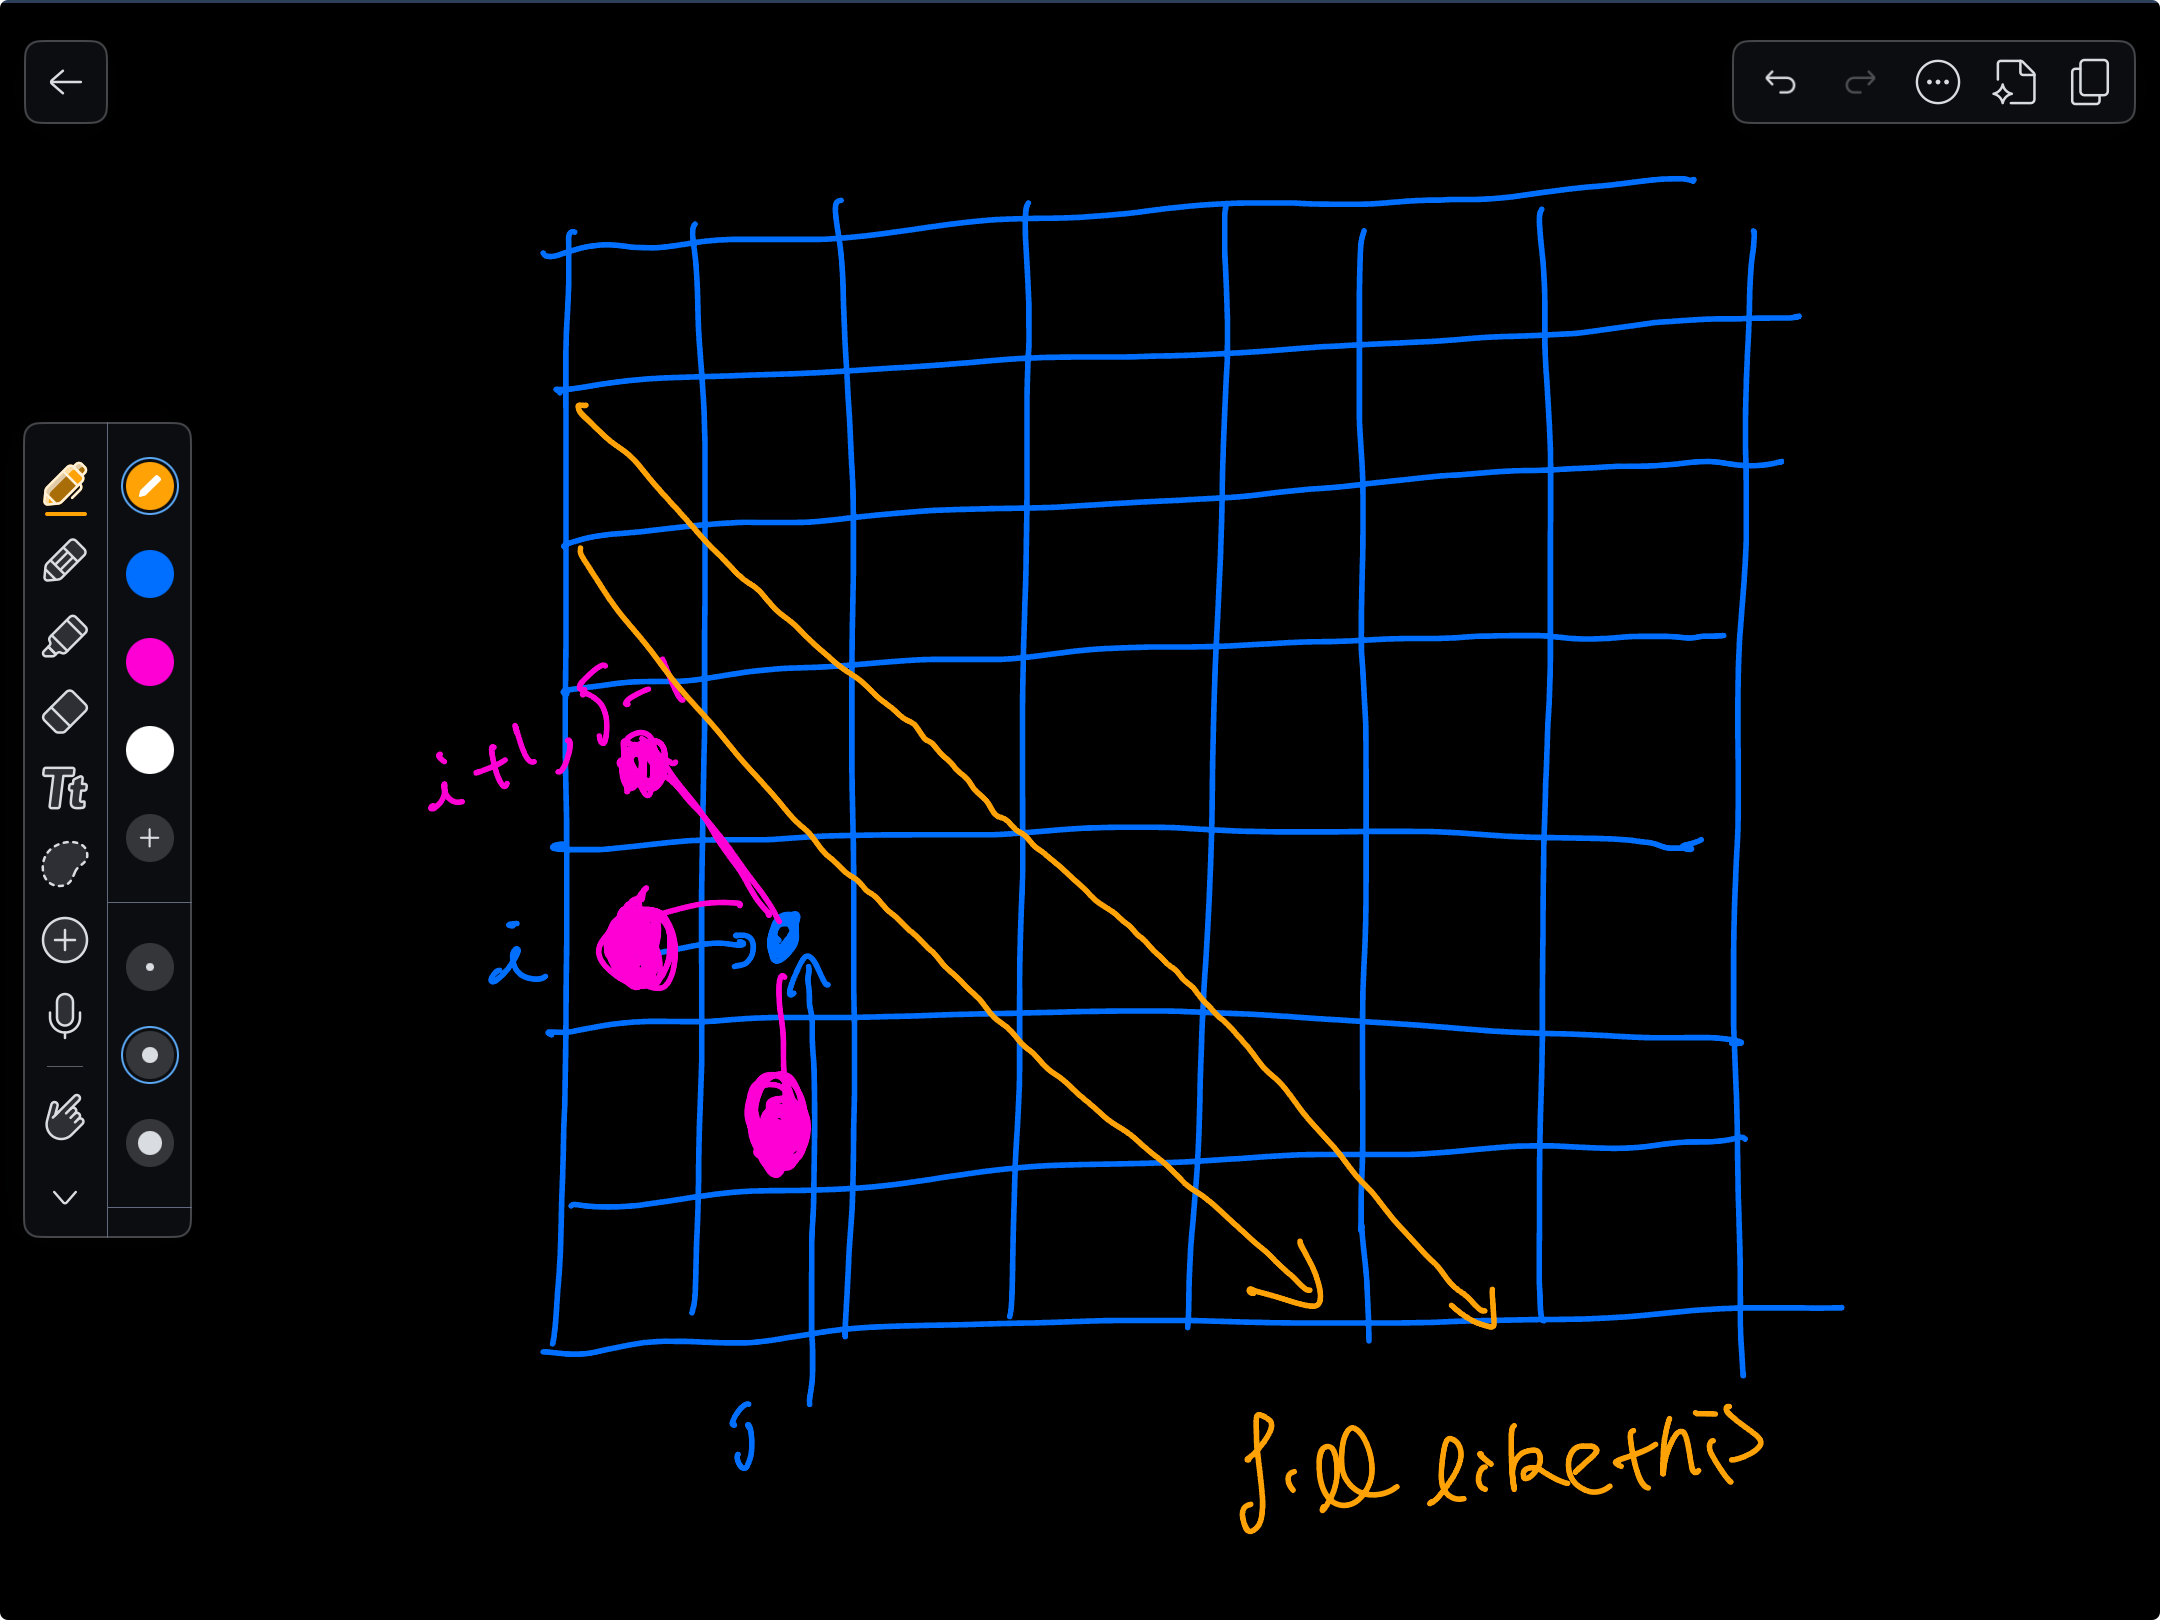

In [ ]:
class Solution {
    public:
        int minInsertions(string s) {
            int n=s.size();
            vector<vector<int>> dp(n,vector<int> (n,0));
            //dp[i][i] requires 0 moves to become a palindrome
            for(int d=1;d<n;d++){
                int i=0,j=d;
                while(i<n and j<n){
                    dp[i][j]= s[i]==s[j]? dp[i+1][j-1]: 1+min(dp[i][j-1],dp[i+1][j]);
                    i++;
                    j++;
                }
            }
            return dp[0][n-1];
            
        }
    };

Q. to make two words equal with minimum no. of deletions in  both string

In [ ]:
class Solution {
    public:
        int f(string s1, string s2, int i, int j){
            if(i<0) return j+1;
            if(j<0) return i+1;
            return s1[i]==s2[j]?f(s1,s2,i-1,j-1):1+min(f(s1,s2,i-1,j),f(s1,s2,i,j-1));
        }
    
        int minDistance(string s1, string s2) {
            int n1=s1.size(), n2=s2.size();
            return f(s1,s2,n1-1,n2-1);        
        }
    };

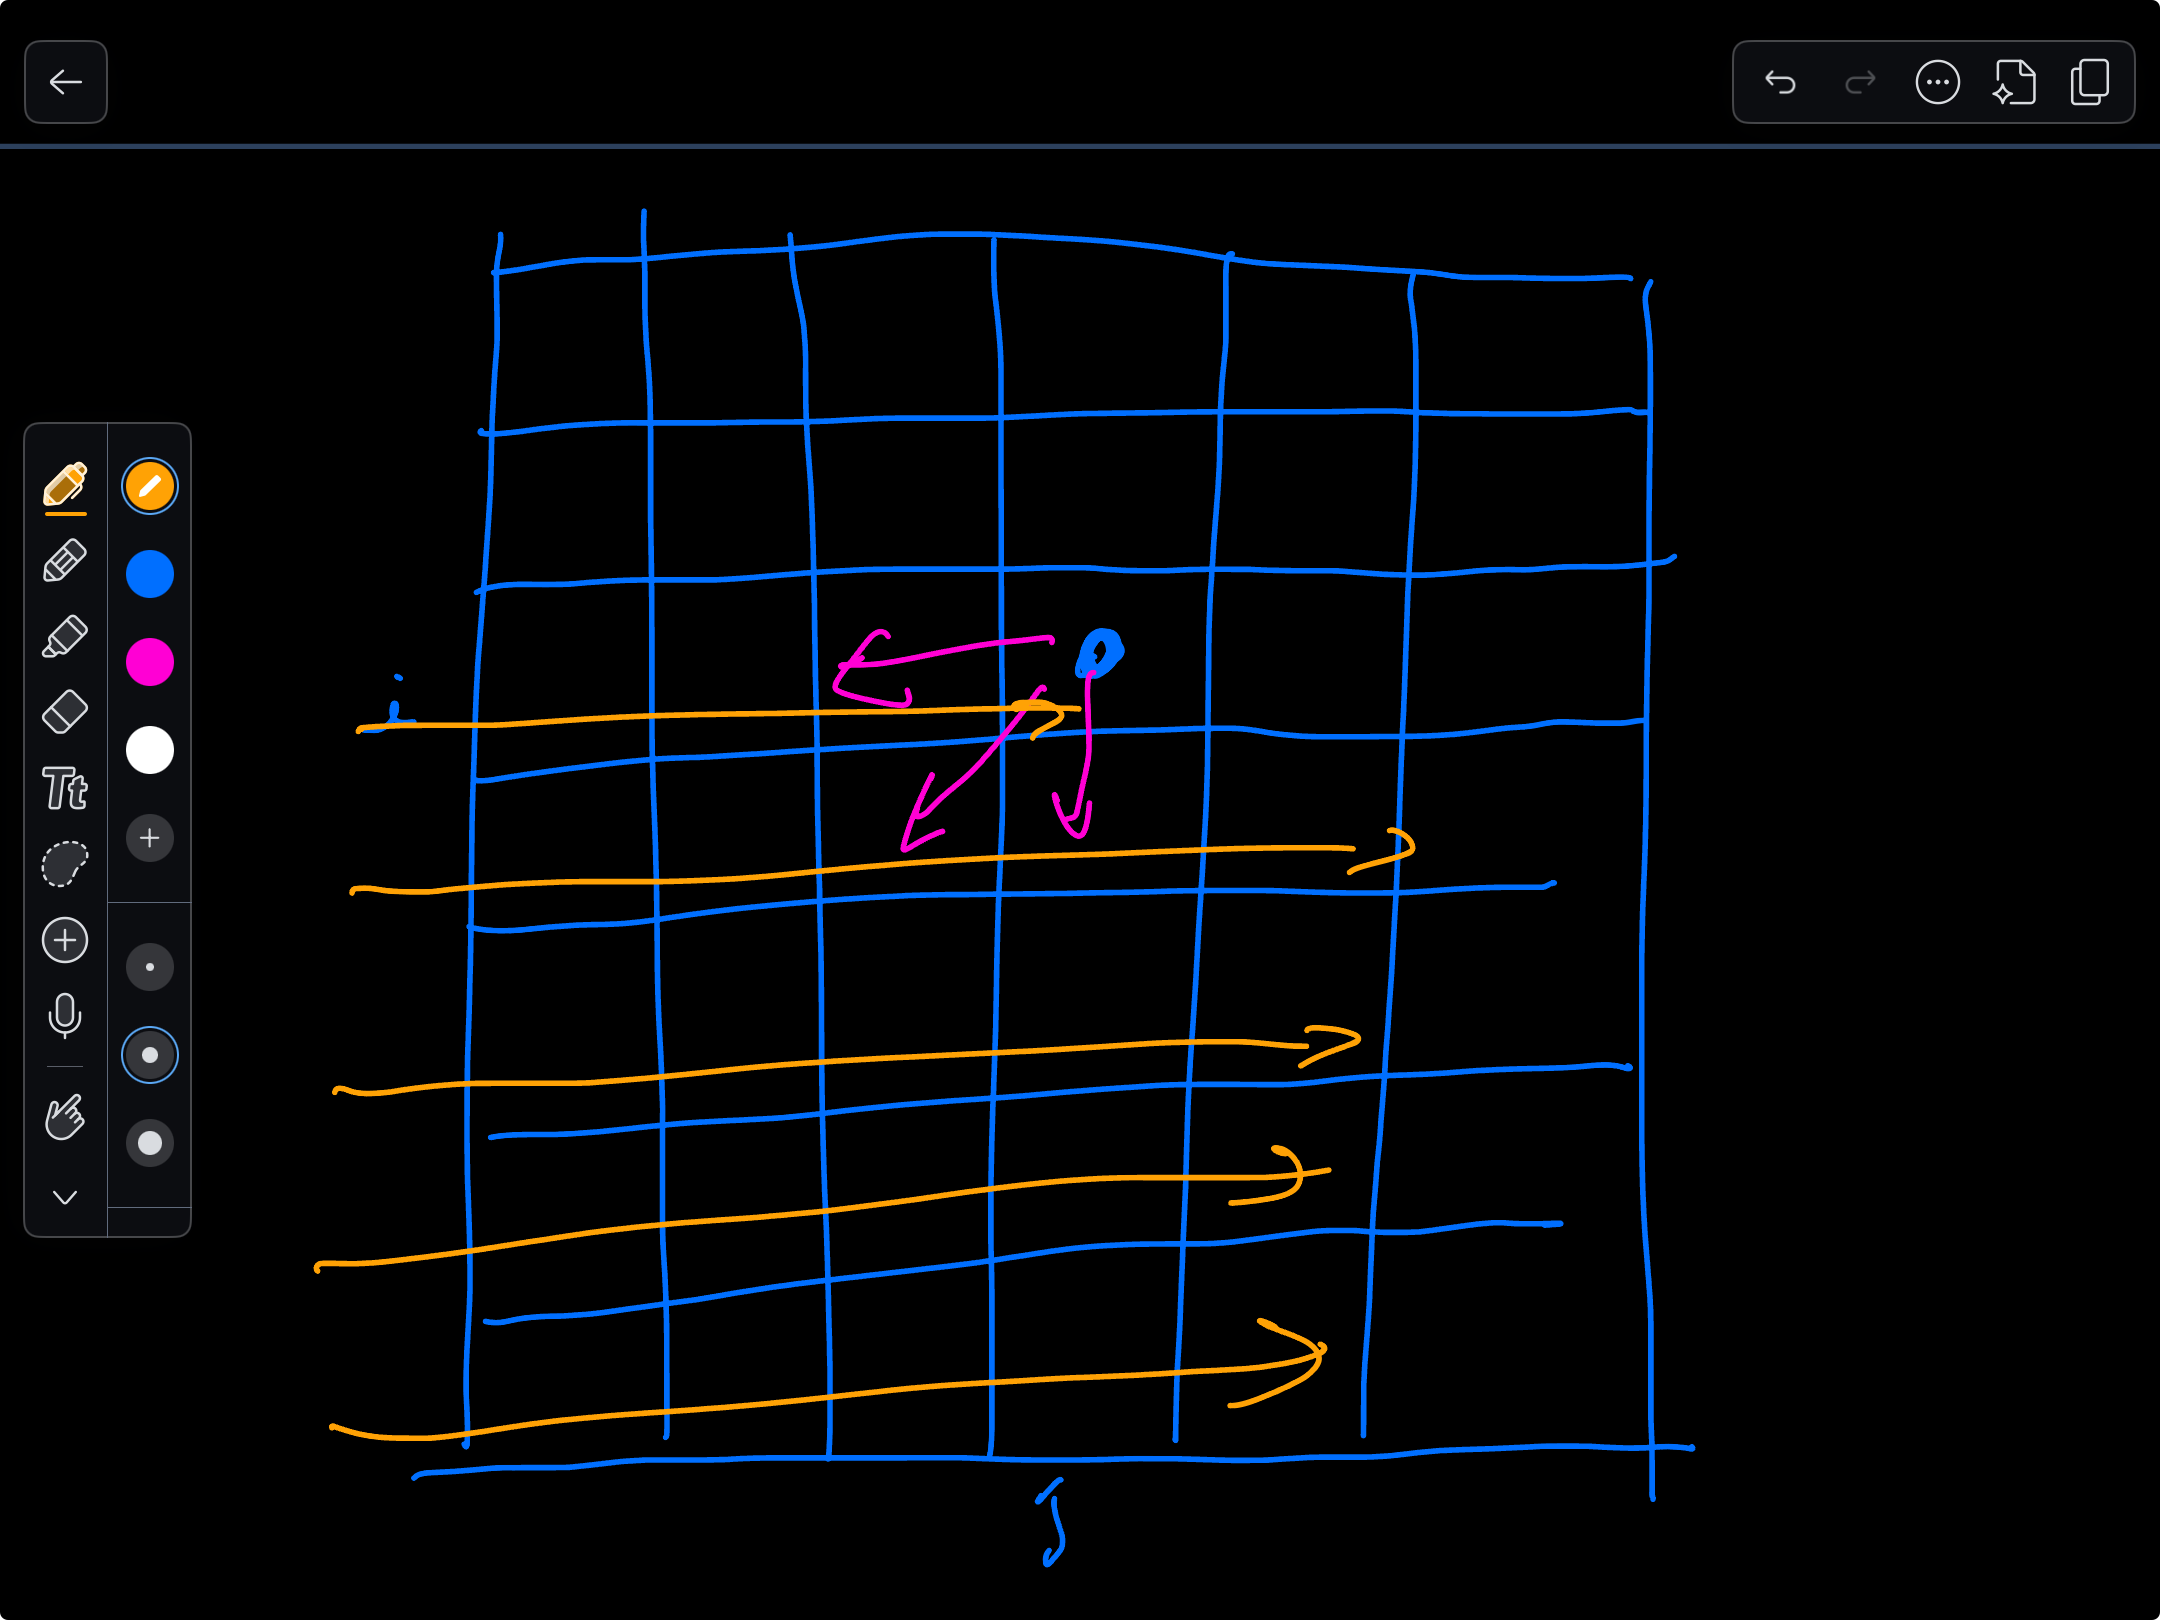

In [ ]:
//dp[i][j]= s1[i-1]==s2[j-1]?dp[i-1][j-1]: 1+ min(dp[i-1][j],dp[i][j-1])
class Solution {
    public:
        int minDistance(string s, string t) {
            //dp[i][j]
            //dp[i][j]
            // if(s[i-1]==t[j-1]) dp[i-1][j-1]
            // else 1+min(dp[i-1][j],dp[i][j-1])
            //dp[i][0]=i
            //dp[0][i]=i 
    
            int n=s.size(),m=t.size();
            vector<vector<int>> dp(n+1,vector<int>(m+1));
            for(int i=0;i<=n;i++) dp[i][0]=i;
            for(int i=0;i<=m;i++) dp[0][i]=i;
            for(int i=1;i<=n;i++){
                for(int j=1;j<=m;j++) dp[i][j] = s[i-1]==t[j-1]? dp[i-1][j-1]:1+min(dp[i-1][j],dp[i][j-1]);
            }
            return dp[n][m];
    
        }
    };

q  Minimum ASCII Delete Sum for Two Strings  
(https://leetcode.com/problems/minimum-ascii-delete-sum-for-two-strings/description/?envType=study-plan-v2&envId=dynamic-programming)

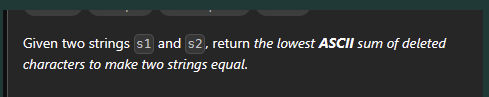

  //dp[0][any]= sum of ascii of s2 
  //dp[any][0]=sum of ascii of s1
  //dp[0][0]=0
//dp[i][j]=s1[i-1]==s2[j-1]?dp[i-1][j-1]:min(s1[i-1]+dp[i-1][j],s2[j-1]+d[i][j-1])

In [ ]:
class Solution {
    public:
        int minimumDeleteSum(string s1, string s2) {
            int n1=s1.size(),n2=s2.size();
            vector<vector<int>> dp(n1+1,vector<int>(n2+1));
            dp[0][0]=0;
            int sum=0;
            for(int i=0;i<n2;i++){
                sum+=s2[i];
                dp[0][i+1]=sum;
            }
            sum=0;
            for(int i=0;i<n1;i++){
                sum+=s1[i];
                dp[i+1][0]=sum;
            }     
    
            for(int i=1;i<=n1;i++)
                for(int j=1;j<=n2;j++)
                    dp[i][j]=s1[i-1]==s2[j-1]?dp[i-1][j-1]:min(s1[i-1]+dp[i-1][j],s2[j-1]+dp[i][j-1]);
            return dp[n1][n2];
    
        }
    };

# Substrings

q. Largest common substring between two strings or vectors
https://www.geeksforgeeks.org/problems/longest-common-substring1452/1

the below code is giving tle

In [ ]:
class Solution {
    public:
      int f(string& s1, string& s2, int i, int j, int currLen,int &ans, vector<vector<vector<int>>> &mem){
          if(i<0 or j<0) return 0;
          
          if(mem[i][j][currLen] != -1) return mem[i][j][currLen];
  
          if(s1[i]==s2[j]){
              currLen=f(s1,s2,i-1,j-1,currLen+1,ans,mem)+1;
              ans = max(ans, currLen);
              return mem[i][j][currLen]=currLen;
          }
          
          f(s1, s2, i - 1, j, 0, ans,mem);
          f(s1, s2, i, j - 1, 0, ans,mem);
          
          return 0;
      }
   
      int longestCommonSubstr(string& s1, string& s2) {
          int n1=s1.size(), n2=s2.size();
          int maxLen = min(n1, n2);
          vector<vector<vector<int>>> mem(n1, vector<vector<int>>(n2, vector<int>(maxLen+1, -1)));
          int ans=0;
          f(s1,s2,n1-1,n2-1,0,ans, mem);
          return ans;
      }
  };

# Seems a new method

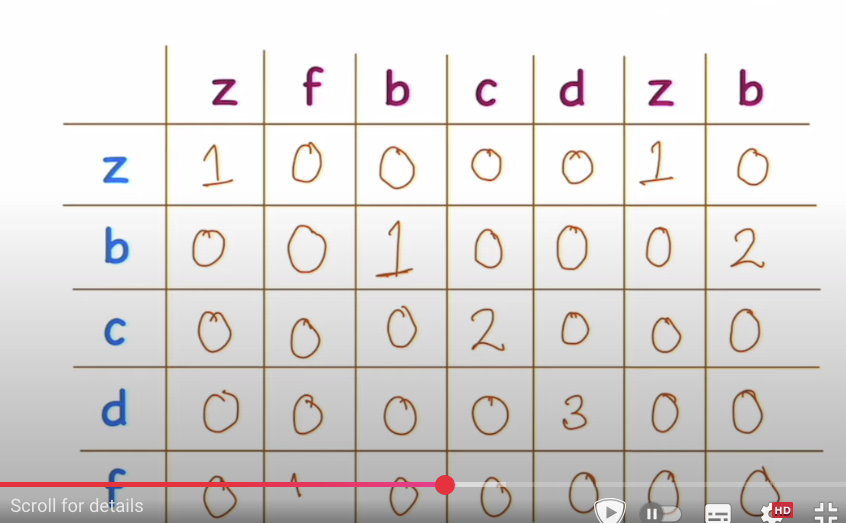

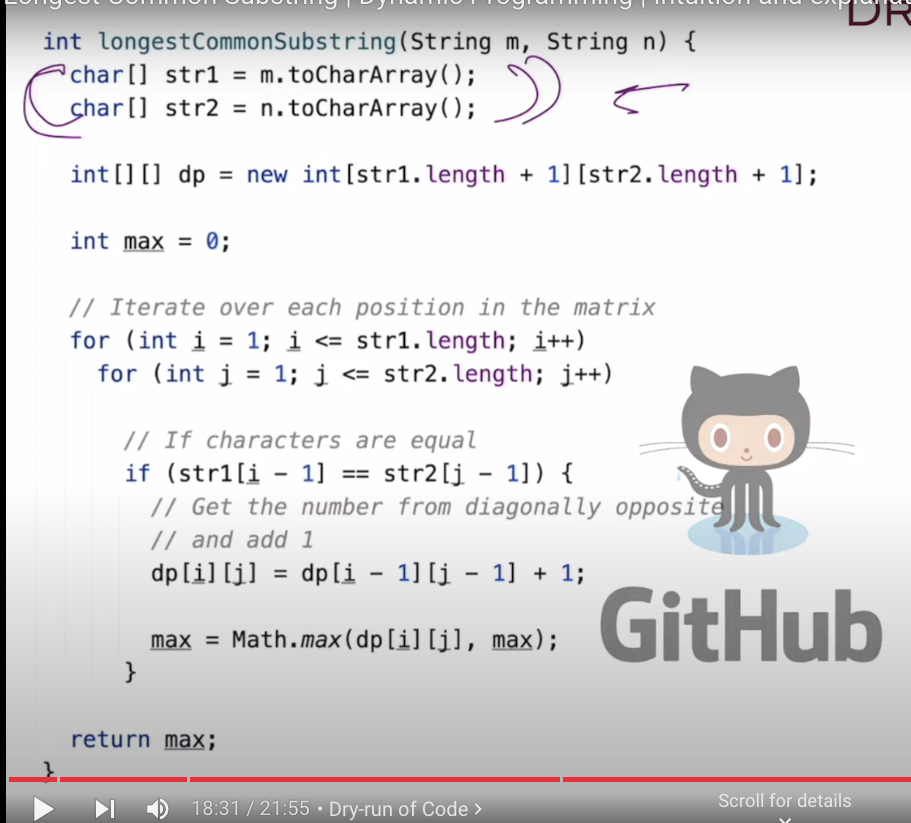

//this seems incorrect
//dp[0][j]=0
//dp[i][0]=0
//dp[i][j]  ::such that the substring end at i and j

////this seems incorrect
//dp[i][j] = s1[i-1]==s2[j-1]?1+dp[i-1][j-1]:0
// keep on doing ans=max(ans,dp[i][j])

In [ ]:
int ans=0;
vector<vector<int>> dp(n+1,vector<int>(m+1,0));
for(int i=1;i<=n;i++){
    for(int j=1;j<=m;j++){
        dp[i][j] = s[i-1]==t[j-1]?1+dp[i-1][j-1]:0;
        ans=max(ans,dp[i][j]);
    }
}
return ans;

q. Largest palindrome substring in a string or vector
https://leetcode.com/problems/longest-palindromic-substring/description/

In [ ]:
class Solution {
    public:
        string longestPalindrome(string s) {
            int n=s.size();
            int fi=0,len=1;
            vector<vector<bool>> dp(n,vector<bool>(n,1));
            for(int d=1;d<n;d++){
                int i=0,j=d;
                while(i<n and j<n){
                    dp[i][j]= s[i]==s[j] and dp[i+1][j-1];
                    if(dp[i][j]){
                        if(j-i+1>len){
                            len=j-i+1;
                            fi=i;
                        }
                    }
                    i++;
                    j++;
                }
            }
            return s.substr(fi,len);
        }
    };

O(n^2) TC and constant space

In [ ]:
class Solution {
    public:
        string expand_from_centre(string &s, int l, int r, int n){
            while(l>=0 and r<n and s[l]==s[r]){
                l--;
                r++;
            }
            return s.substr(l+1,r-1-(l+1)+1);
        }
    
    
        string longestPalindrome(string s) {
            int n=s.size();
            if(n<=1) return s;
            string max_string=s.substr(0,1);
            for(int i=0;i<=n-2;i++){
                string odd=expand_from_centre(s,i,i,n);
                string even=expand_from_centre(s,i,i+1,n);
                if(odd.size()>max_string.size()){
                    max_string=odd;
                }
                if(even.size()>max_string.size()){
                    max_string=even;
                }
            }
            return max_string;
        }
    };

with manacher
https://youtu.be/IvakBbsAhUU?si=bNYdKxB4IFCo1sTj

# Subsequences

q. Largest Same Subsequence in two string or vector
(https://leetcode.com/problems/longest-common-subsequence/)

In [ ]:
class Solution {
    public:
    
        int f(string &s1, string &s2, int i, int j){
            if(i<0 or j<0) return 0;
            return s1[i]==s2[j]?1+f(s1,s2,i-1,j-1):max(f(s1,s2,i,j-1), f(s1,s2,i-1,j));
        } 
    
    
        int longestCommonSubsequence(string s1, string s2) {
            int n1=s1.size(),n2=s2.size();
            return f(s1,s2,n1-1,n2-1);
        }
    };

In [ ]:
//dp[i][j]=s1[i-1]==s2[j-1]?1+dp[i-1][j-1]:max(dp[i-1][j],dp[i][j-1])
//dp[0][0]=0
//dp[i][0]=0
//dp[0][j]=0

In [ ]:
class Solution {
    public:
        int longestCommonSubsequence(string s1, string s2) {
            int n1=s1.size(),n2=s2.size();
            vector<vector<int>> dp(n1+1,vector<int>(n2+1,0));
            for(int i=1;i<=n1;i++){
                for(int j=1;j<=n2;j++){
                    dp[i][j]= s1[i-1]==s2[j-1] ? 1+dp[i-1][j-1] : max(dp[i-1][j],dp[i][j-1]);
                }
            }
            return dp[n1][n2];
        }
    };

q. Printing the lcs

In [ ]:
dp[i][j]=s1[i-1]==s2[j-1]?1+dp[i-1][j-1]:max(dp[i-1][j],dp[i][j-1])
dp[0][0]=0
dp[i][0]=0
dp[0][j]=0

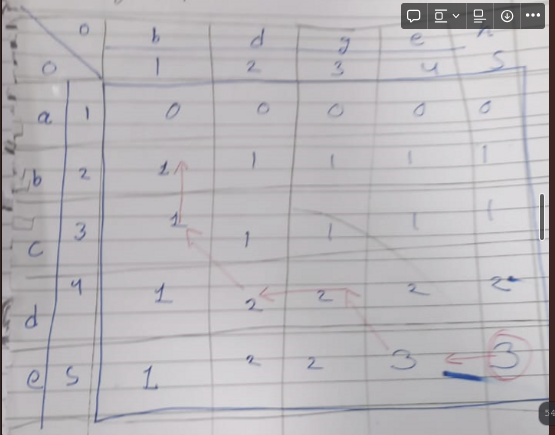

In [ ]:
string ans;
int i=n1,j=n2;
while(i>0 and j>0){
	if(s1[i-1]==s2[j-1]){
		ans.push_back(s1[i-1]);
		i--;
		j--;
	}
	else if(dp[i-1][j]==dp[i][j]) i--;
	else j--;
}
reverse(it(ans));

q. Longest Repeating Subsequence



In [ ]:
//we can make a copy of the string and can have some new conditions
dp[i][j]= s1[i-1]==s2[j-1] and i!=j ? 1+dp[i-1][j-1] : max(dp[i-1][j],dp[i][j-1]);

In [ ]:
int LongestRepeatingSubsequence(string s){
    string s1=s,s2=s;
    int n=s.size();
    int n1=n,n2=n;
    vector<vector<int>> dp(n1+1,vector<int>(n2+1,0));
    for(int i=1;i<=n1;i++){
        for(int j=1;j<=n2;j++){
            dp[i][j]= s1[i-1]==s2[j-1] and i!=j ? 1+dp[i-1][j-1] : max(dp[i-1][j],dp[i][j-1]);
        }
    }
    return dp[n1][n2];
}

q. Largest Palindromic subsequence in a string or a vector

Finding largest palindrome by finding largest subsequence between s and s rev
1. You have to create srev

In [ ]:
#define it(v) v.begin(), v.end()
class Solution {
public:
    int longestCommonSubsequence(string s1, string s2) { 
        int n1=s1.size(),n2=s2.size(); 
        vector<vector<int>> dp(n1+1,vector<int>(n2+1,0)); 
        for(int i=1;i<=n1;i++){ 
            for(int j=1;j<=n2;j++){ 
                dp[i][j]= s1[i-1]==s2[j-1] ? 1+dp[i-1][j-1] : max(dp[i-1][j],dp[i][j-1]); 
            } 
        } 
        return dp[n1][n2]; 
    } 


    int longestPalindromeSubseq(string s1) {
        string s2=s1;
        reverse(it(s1));
        return longestCommonSubsequence(s1,s2);
        
    }
};

In [ ]:
int f(string &s, int i, int j){
    if(i>j) return 0;
    if(i==j) return 1;
    return s[i]==s[j]?2+f(s,i+1,j-1):max(f(s,i+1,j),f(s,i,j-1));
}


int longestPalindromeSubseq(string s) {
    int n=s.size();
    int i=0,j=n-1;
    return f(s,i,j);
}

In [ ]:
//dp[i][j]= s[i]==s[j]?2+dp[i+1][j-1]:max(dp[i+1][j],dp[i][j-1]);
vvl dp(n,vl(n,0));
for(int i=0;i<n;i++) dp[i][i]=1;
for(int d=1;d<n;d++){
	int r=0,c=d;
	while(r<n and c<n){
        dp[i][j]= s[i]==s[j]?2+dp[i+1][j-1]:max(dp[i+1][j],dp[i][j-1]);
		r++;
		c++;
	}
}

q. Given two strings s and t, return the number of distinct subsequence of s which equals t.  
(https://leetcode.com/problems/distinct-subsequences/description/)

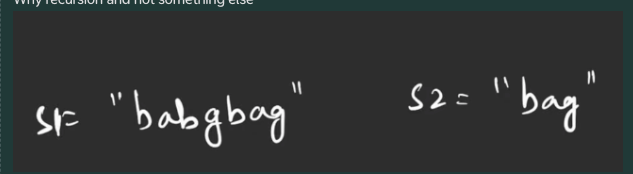

In [ ]:
int f(int i, int j, string &s, string &t){
    if(j<0) return 1;
    if(i<0) return 0;
    if(s[i]==t[j]){
        return f(i-1,j-1,s,t)+f(i-1,j,s,t);
    }
    return f(i-1,j,s,t);
}


int numDistinct(string s, string t) {
    //no. of distinct subsequence of s which is same as t
    int ns=s.size(),nt=t.size();
    return f(ns-1,nt-1,s,t);
}

In [ ]:
dp[i][j]=
if(s[i-1]!=p[j-1]) dp[i][j]=dp[i-1][j]
else dp[i][j]=dp[i-1][j-1]+dp[i-1][j]
dp[0][any]=0
dp[any][0]=1
dp[0][0]=1

In [ ]:
class Solution {
    public:
        int numDistinct(string s, string p) {
                int ss=s.size(),ps=p.size();
                vector<vector<int>> dp(ss+1,vector<int> (ps+1,0));
                for(int i=1;i<=ss;i++) dp[i][0]=1;
                dp[0][0]=1
                for(int i=1;i<=ss;i++)
                    for(int j=1;j<=ps;j++)
                        dp[i][j]= s[i-1]!=p[j-1]?dp[i-1][j]:dp[i-1][j-1]+dp[i-1][j];
                return dp[ss][ps];
            }
    };

In [ ]:
//space optimized
#define mod 10000000000
#define moda(a,b) ((a%mod)+(b%mod))%mod

class Solution {
public:
int numDistinct(string s, string p) {
        int ss=s.size(),ps=p.size();
        vector<int> prev(ps+1,0),curr(ps+1);
        prev[0]=1;
        curr[0]=1;
        for(int i=1;i<=ss;i++){
            for(int j=1;j<=ps;j++){
                curr[j]= s[i-1]!=p[j-1]?prev[j]:moda(prev[j-1],prev[j]);
            }
            prev=curr;
        }
        return curr[ps];
    }
};

In [ ]:
//Ac leetcode exception
#define mod 10000000000
#define moda(a,b) ((a%mod)+(b%mod))%mod

class Solution {
public:
    int numDistinct(string s, string p) {
            int ss=s.size(),ps=p.size();
            vector<vector<int>> dp(ss+1,vector<int> (ps+1,0));
            for(int i=1;i<=ss;i++) dp[i][0]=1;
            dp[0][0]=1;
            for(int i=1;i<=ss;i++)
                for(int j=1;j<=ps;j++)
                    dp[i][j]= s[i-1]!=p[j-1]?dp[i-1][j]:moda(dp[i-1][j-1],dp[i-1][j]);
            return dp[ss][ps];
        }
};

# Edit  distance, wildcard matching, pattern matching,

q.1 min. no of operations required to change s into t when we can do following with s


In [ ]:
dp[i][j]= s[i-1]==t[i-1]?dp[i-1][j-1]:1+min(
    dp[i][j-1]. //added a character in s which mateched with t and the next char of t got activated
    dp[i-1][j].// deleted a char of s
    dp[i-1][j-1] //replaced a character of s which matched with t
    );

In [ ]:
dp[0][any]=any;     //added a character in s
dp[any][0]=any;    //deleted a char of s
dp[0][0]=0;    


In [ ]:

class Solution {
    public:
        int minDistance(string w1, string w2) {
            int n1=w1.size(),n2=w2.size();
            vector<vector<int>> dp(n1+1,vector<int> (n2+1));
            for(int i=0;i<=n2;i++) dp[0][i]=i; 
            for(int i=0;i<=n1;i++) dp[i][0]=i; 
            dp[0][0]=0;
    
            for(int i=1;i<=n1;i++){
                for(int j=1;j<=n2;j++){
                    dp[i][j]= w1[i-1]==w2[j-1]?dp[i-1][j-1]:1+min(
                        {dp[i][j-1], //added a character in s which mateched with t and the next char of t got activated
                        dp[i-1][j],// deleted a char of s
                        dp[i-1][j-1]} //replaced a character of s which matched with t
                        );
                }
            }
            return dp[n1][n2];
        }
    };
    

In [ ]:

class Solution {
    public:
        int f(int i, int j,string &w1, string &w2,  vector<vector<int>> &mem ){
            if(i<0) return j+1;
            if(j<0) return i+1;
            if(mem[i][j]!=-1) return mem[i][j];
            if(w1[i]==w2[j]) return mem[i][j]=f(i-1,j-1,w1,w2,mem);
            return mem[i][j]=1+min(
                {f(i-1,j-1,w1,w2,mem),
                f(i,j-1,w1,w2,mem),
                f(i-1,j,w1,w2,mem)}
            );
        }
    
        int minDistance(string w1, string w2) {
            int n1=w1.size(),n2=w2.size();
            vector<vector<int>> mem(n1,vector<int> (n2,-1));
            return f(n1-1,n2-1,w1,w2,mem);    
        }
    };

Pattern matching having wildcard inside it   
https://leetcode.com/problems/wildcard-matching/description/

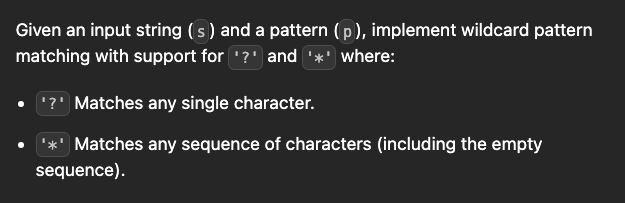

This one is tricky as it require one more preprocessing also

In [ ]:
bool f(string &s, string &p, int i, int j, int lastIdx, vector<vector<int>> &mem){
    if(i<0) return j<=lastIdx;
    if(j<0) return 0;
    if(mem[i][j]!=-1) return mem[i][j];
    int ans;
    if(p[j]=='?') ans=f(s,p,i-1,j-1,lastIdx,mem);
    else if(p[j]=='*') ans=f(s,p,i-1,j,lastIdx,mem) or f(s,p,i,j-1,lastIdx,mem);
    else if(p[j]==s[i]) ans=f(s,p,i-1,j-1,lastIdx,mem);
    else ans=0;
    return mem[i][j]=ans;
}

bool isMatch(string s, string p) {
    //? single character 
    //* any number of characters
    // s is the string
    // p is pattern
    int ns=s.size(),np=p.size();
    vector<vector<int>> mem(ns,vector<int>(np,-1));
    if(ns==0 and np==0) return 1;
    if(np==0) return 0;
    //scan p for continous *
    int lastIdx=-1;
    while(lastIdx<=np-2 and p[lastIdx+1]=='*'){
        lastIdx++;
    }
    if(lastIdx==np-1) return 1;
    if(ns==0) return 0;
    return f(s,p,ns-1,np-1,lastIdx,mem);
}

In [ ]:
class Solution {
    public:
        bool isMatch(string s, string p) {
            int n=s.size(),m=p.size();
            int lastIdx=-1;
            while(lastIdx<=m-2 and p[lastIdx+1]=='*') lastIdx++;
            vector<vector<int>> dp(n+1,vector<int> (m+1,0));
    
            //dp[0][any]====>depeneds
            for(int i=1;i<=m;i++) if(i<=lastIdx+1) dp[0][i]=1;
            //dp[any][0]=====>0
            //dp[0][0]==1
            dp[0][0]=1;
            
    
            for(int i=1;i<=n;i++){
                for(int j=1;j<=m;j++){
                    if(s[i-1]==p[j-1] or p[j-1]=='?') dp[i][j]=dp[i-1][j-1];
                    if(p[j-1]=='*')  dp[i][j]=dp[i-1][j] or dp[i][j-1]; 
                    if(p[j-1]!='?' and p[j-1]!='*' and s[i-1]!=p[j-1]) dp[i][j]=0;
                }
            }
            return dp[n][m];    
        }
    };

10. Regular Expression Matching     
https://leetcode.com/problems/regular-expression-matching/description/

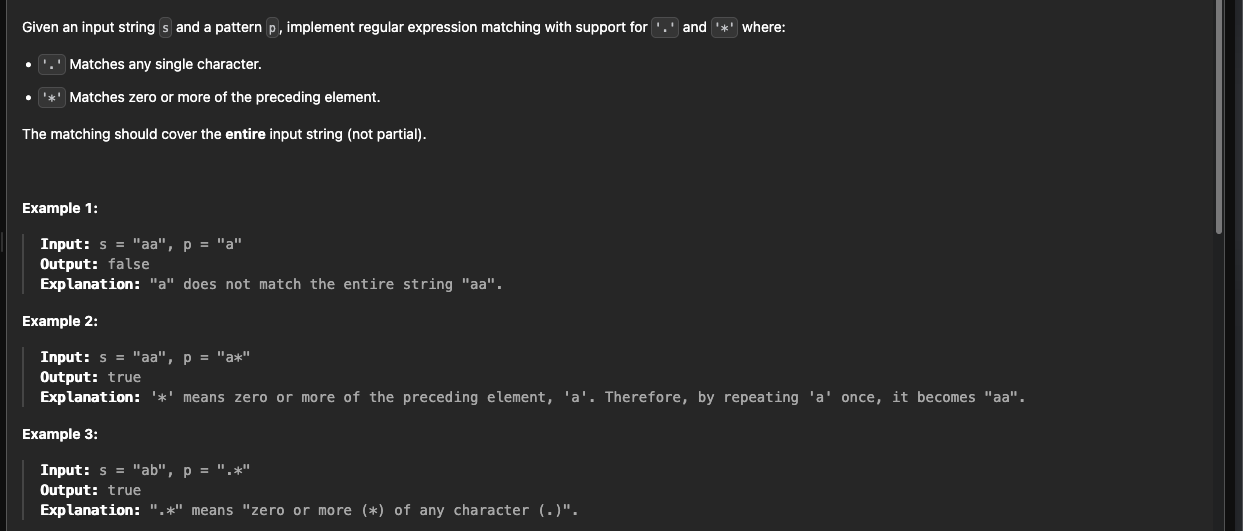

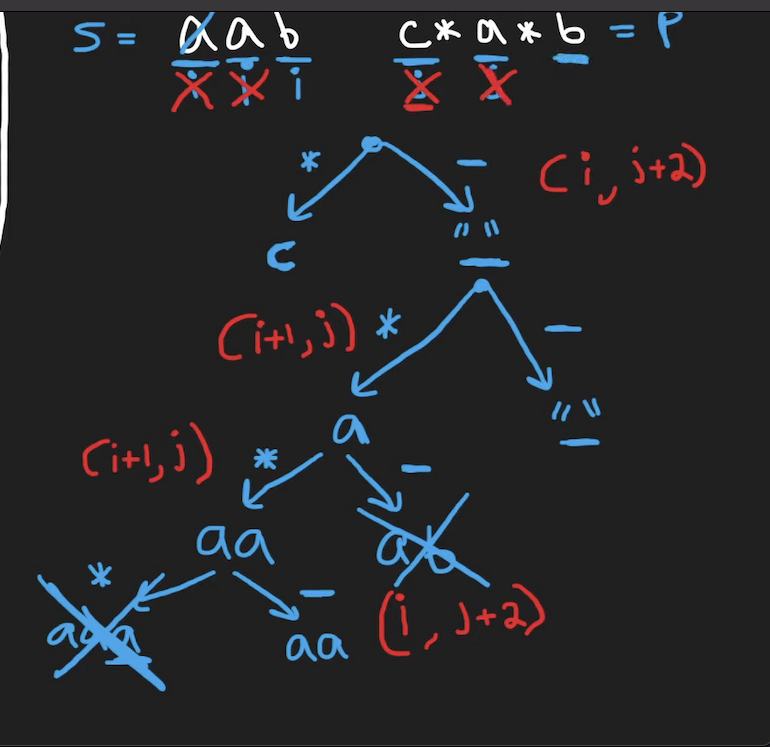
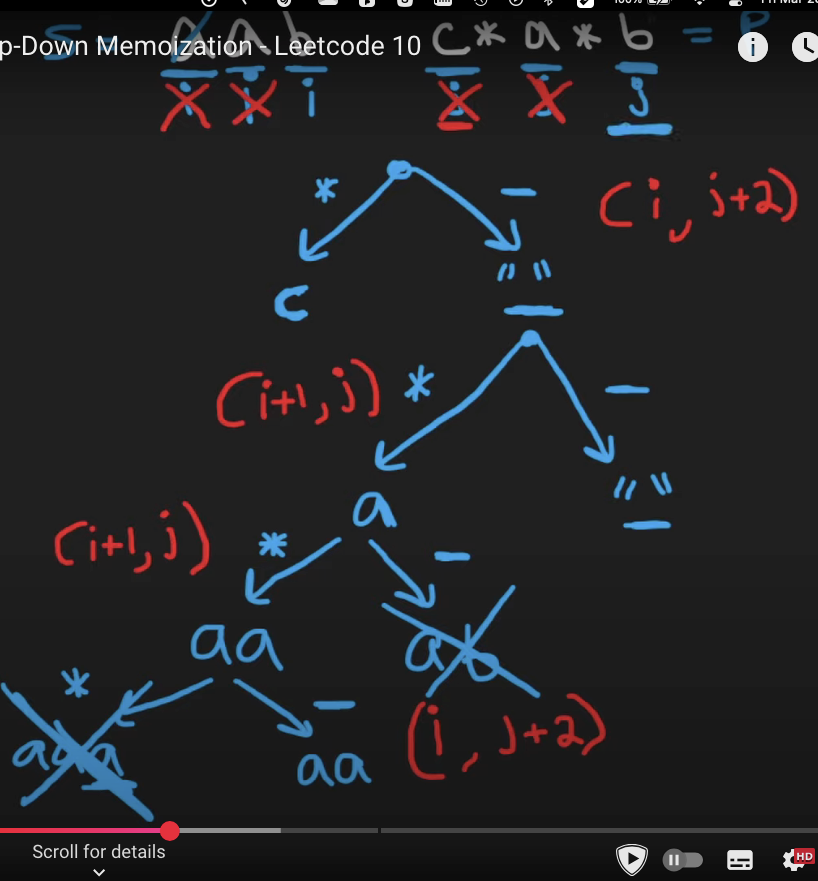

In [ ]:
class Solution {
    public:
        bool f(int i, int j, string &s, string &p, int ns, int np){
            if(j>=np) return i>=ns;
            //nothing can be said if we had exhasuted i, it can still match with the pattern
    
            //as we are not making sanitu check on the top for i, so we will do it here
            bool match= i<ns and (s[i]==p[j] or p[j]=='.');
    
            //case when the next char is *
            if(j+1<np and p[j+1]=='*'){
                return f(i,j+2,s,p,ns,np)//not considering any character left of * in matching
                or (match and f(i+1,j,s,p,ns,np)); //considering it
            }    
    
            return match and f(i+1, j+1, s, p, ns, np);
        }
    
        bool isMatch(string s, string p) {
            int ns=s.size(),np=p.size();
            return f(0,0,s,p,ns,np);
        }
    };

# Doubt

In [ ]:
class Solution {
    public:
    
        bool isMatch(string s, string p) {
            int ns=s.size(),np=p.size();
            //dp[ns][any]== tbc
            //dp[any][np]=0
            //dp[ns][np]=1
            vector<vector<bool>> dp(ns + 1, vector<bool>(np + 1, 0));
            dp[ns][np] = 1;
    
            for (int i = ns; i >= 0; i--) {
                for (int j = np - 1; j >= 0; j--) {
                    bool match = i < ns && (s[i] == p[j] || p[j] == '.');

                    if ((j + 1) < np and  p[j + 1] == '*') {
                        dp[i][j] = dp[i][j + 2];
                        
                        if (match) {
                            dp[i][j] = dp[i + 1][j] || dp[i][j];
                        }
                    } 
                    
                    else if (match) {
                        dp[i][j] = dp[i + 1][j + 1];
                    }
                }
            }
            return dp[0][0];
        }
    };

In [ ]:
//space optimized, this one we are weirdy feeling so be carefull
